<a href="https://colab.research.google.com/github/jay-pm/Deep-Learning/blob/master/Image_Classification_using_tf_keras_jay_JUN2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Image Classification using tf.keras**

We will classify images of flowers by building an image classifier using tf.keras.Sequential model and load data using tf.keras.preprocessing.image.ImageDataGenerator.

*Import packages*

- numpy: for matrix operations
- os: for reading files and directory strcture
- matplotlib.pyplot : for plotting

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import glob
import shutil

*Import TensorFlow and Keras Layers*

- tensorflow: numerical computation framework
- keras.layers : for building CNN and DNN layers
- ImageDataGenerator: for image augmentation 

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

*Load the data*

Let's download the flowers image data from URL.

In [3]:
URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=URL, fname="flower_photos.tgz", extract=True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

228818944/228813984 [==============================] - 2s 0us/step


The dataset we downloaded contains images of 5 types of flowers:

    Rose
    Daisy
    Dandelion
    Sunflowers
    Tulips

So, let's create the labels for these 5 classes:

In [0]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

The dataset we have downloaded has following directory structure.

  - flower_photos
        diasy
        dandelion
        roses
        sunflowers
        tulips
        
 
As ythere are no folders containing training and validation data we will have to create our own training and validation set.

The code below creates a train and a val folder each containing 5 folders (one for each type of flower). It then moves the images from the original folders to these new folders such that 80% of the images go to the training set and 20% of the images go into the validation set. In the end our directory will have the following structure:

- flower_photos
          diasy
          dandelion
          roses
          sunflowers
          tulips
          train
              daisy: [1.jpg, 2.jpg, 3.jpg ....]
              dandelion: [1.jpg, 2.jpg, 3.jpg ....]
              roses: [1.jpg, 2.jpg, 3.jpg ....]
              sunflowers: [1.jpg, 2.jpg, 3.jpg ....]
              tulips: [1.jpg, 2.jpg, 3.jpg ....]
           val
              daisy: [507.jpg, 508.jpg, 509.jpg ....]
              dandelion: [719.jpg, 720.jpg, 721.jpg ....]
              roses: [514.jpg, 515.jpg, 516.jpg ....]
              sunflowers: [560.jpg, 561.jpg, 562.jpg .....]
              tulips: [640.jpg, 641.jpg, 642.jpg ....]   

Since we don't delete the original folders, they will still be in our flower_photos directory, but they will be empty. The code below also prints the total number of flower images we have for each type of flower.

In [5]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  num_train = int(round(len(images)*0.8))
  train, val = images[:num_train], images[num_train:]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

roses: 641 Images
daisy: 633 Images
dandelion: 898 Images
sunflowers: 699 Images
tulips: 799 Images


 let us set up the path for the training and validation sets

In [0]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

Overfitting generally occurs when we have small number of training examples. One way to fix this problem is to augment our dataset so that it has sufficient number of training examples. Data augmentation takes the approach of generating more training data from existing training samples, by augmenting the samples via a number of random transformations that yield believable-looking images. The goal is that at training time, your model will never see the exact same picture twice. This helps expose the model to more aspects of the data and generalize better.

In **tf.keras** we can implement this using the same **ImageDataGenerator** class we used before. We can simply pass  different transformations we would want to our dataset as a form of arguments and it will take care of applying it to the dataset during our training process. 

In [0]:
#  Set Batch and Image Size
batch_size = 100
IMG_SHAPE = 150 

In [8]:
# apply data augmentation on training set

image_gen_train = ImageDataGenerator(
                    rescale=1./255, 
                    rotation_range=45, 
                    width_shift_range=.15, 
                    height_shift_range=.15, 
                    horizontal_flip=True, 
                    zoom_range=0.5
                    )


train_data_gen = image_gen_train.flow_from_directory(
                                                batch_size=batch_size, 
                                                directory=train_dir, 
                                                shuffle=True, 
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse'
                                                )

Found 2935 images belonging to 5 classes.


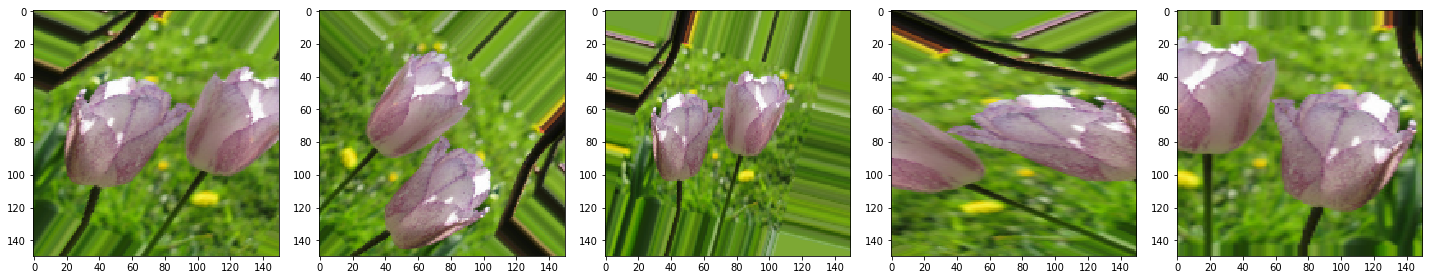

In [9]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

# view few images
plotImages([train_data_gen[0][0][0] for i in range(5)])

**Create a Data Generator for the Validation Set**

Data augmentation is only applied to training data. So we will use ImageDataGenerator to create a transformation that only rescales the images by 255. Then use the .flow_from_directory method to apply the above transformation to the images in our validation set. We need to indicate the batch size, the path to the directory of the validation images, the target size for the images, and to set the class mode to sparse. It is not necessary to shuffle the images in the validation set.

In [10]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size, 
                                                 directory=val_dir, 
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse')

Found 735 images belonging to 5 classes.


**Create the CNN**

We will create a convolutional neural network that consists of 3 convolution blocks. Each convolutional block contains a Conv2D layer followed by a max pool layer. The first convolutional block will have 16 filters, the second one will have 32 filters, and the third one will have 64 filters. All convolutional filters will be 3 x 3. All max pool layers will have a pool_size of (2, 2) .

After the 3 convolutional blocks we will have a flatten layer followed by a fully connected layer with 512 units. The CNN will output class probabilities based on 5 classes which is done by the softmax activation function. All other layers will use a relu activation function. We will also add Dropout layers with a probability of 20%.

In [11]:
model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3))) 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


**Compile the Model**

We will compile our model using the ADAM optimizer, the sparse cross entropy function as a loss function. We will look at training and validation accuracy on each epoch as we train our network, so we will also pass the metrics argument.

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Train the Model**

We will train our model using the fit_generator function instead of the usual fit function. We have to use the fit_generator function because we are using the ImageDataGenerator class to generate batches of training and validation data for our model. Train the model for 80 epochs

In [13]:
epochs = 20

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(batch_size)))
)

Epoch 1/20
30/30 [==============================] - 121s 4s/step - loss: 1.7114 - acc: 0.3158 - val_loss: 1.4055 - val_acc: 0.3415
Epoch 2/20
30/30 [==============================] - 115s 4s/step - loss: 1.2477 - acc: 0.4603 - val_loss: 1.1568 - val_acc: 0.4735
Epoch 3/20
30/30 [==============================] - 115s 4s/step - loss: 1.1217 - acc: 0.5390 - val_loss: 1.2357 - val_acc: 0.4898
Epoch 4/20
30/30 [==============================] - 115s 4s/step - loss: 1.1019 - acc: 0.5404 - val_loss: 1.0329 - val_acc: 0.6245
Epoch 5/20
30/30 [==============================] - 115s 4s/step - loss: 1.0066 - acc: 0.5973 - val_loss: 0.9403 - val_acc: 0.6531
Epoch 6/20
30/30 [==============================] - 115s 4s/step - loss: 0.9675 - acc: 0.6167 - val_loss: 1.0231 - val_acc: 0.6163
Epoch 7/20
30/30 [==============================] - 115s 4s/step - loss: 0.9248 - acc: 0.6313 - val_loss: 0.8818 - val_acc: 0.6463
Epoch 8/20
30/30 [==============================] - 114s 4s/step - loss: 0.8872 - a

Plot Training and Validation Graphs.

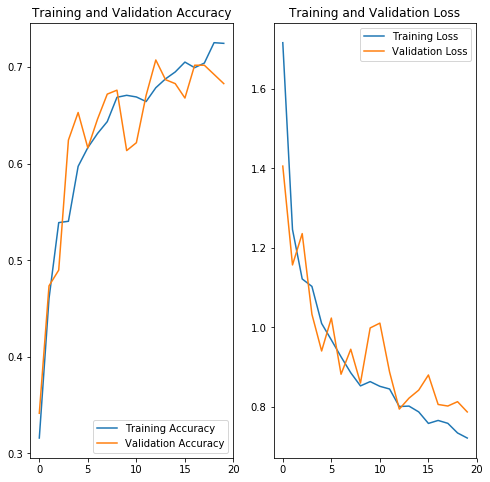

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()